# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load csv (Remember to change these)PyBer_ride_data.csv
pyber_ride_df = pd.read_csv("Resources/PyBer_ride_data.csv")
pyber_ride_df
pyber_city_df = pd.read_csv("Resources/PyBer_city_data.csv")
pyber_city_df

#city_data_to_load = "city_data.csv"
#ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
#city_data_df = pd.read_csv(pyber_city_df)
#ride_data_df = pd.read_csv(pyber_ride_df)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(pyber_ride_df, pyber_city_df, how="left", on=["city"])

# Display the data table for preview
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

## Deliverable 1: Get a Summary DataFrame 

In [3]:
#Create the Urban city DateFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
#Create the Suburban city DateFrame
suburban_cities_df= pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [5]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [6]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = pyber_city_df.groupby(["type"]).count()["driver_count"]
total_drivers_by_city_type.head()

type
Rural       18
Suburban    36
Urban       66
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
total_fare_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_city_type.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride_city_type = total_fare_city_type / total_rides_by_city_type
average_fare_per_ride_city_type.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
#5 Get the average number of drivers for each city. 
average_number_drivers_city = total_fare_city_type / total_drivers_by_city_type 
average_number_drivers_city.head()

type
Rural       240.440556
Suburban    537.675833
Urban       603.854242
dtype: float64

In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
total_rides_by_city_type.index.name = None
total_rides_by_city_type

Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [12]:
#  6. Create a PyBer summary DataFrame. 
# Combine the data into a single dataset
pyber_summary_df = pd.DataFrame(
            {'Total Rides':total_rides_by_city_type,
             'Total Drivers': total_drivers_by_city_type,
             'Total Fares':total_fare_city_type,
             #'Average Fare per Ride':average_fare_per_ride_city_type,
             'Average Fare per Driver':average_number_drivers_city})

# Display the data table for preview
pyber_summary_df                                                                                    

,Total Rides,Total Drivers,Total Fares,Average Fare per Driver
Rural,125,18,4327.93,240.440556
Suburban,625,36,19356.33,537.675833
Urban,1625,66,39854.38,603.854242


In [13]:
#Cleanig up the DataFrame. Delete the index name 
total_drivers_by_city_type.index.name = None
#total_drivers_by_city_type

In [14]:
total_fare_city_type.index.name = None
total_fare_city_type

Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [15]:
#  8. Format the columns.
summary_df = pd.DataFrame()

summary_df["Total Rides"] = total_rides_by_city_type
summary_df["Total Drivers"] = total_drivers_by_city_type
summary_df["Total Fares"] = total_fare_city_type
summary_df["Average Fare per Ride"] = average_fare_per_ride_city_type
summary_df["Average Fare per Driver"] = total_drivers_by_city_type

summary_df
                                                     

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,18,4327.93,34.623440,18
Suburban,625,36,19356.33,30.970128,36
Urban,1625,66,39854.38,24.525772,66


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [16]:
# 1. Read the merged DataFrame (use groupby(), and sum())
fares_by_type_date_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
fares_by_type_date_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [17]:
# 2.  Step 2, use the provided code snippet to reset the index. This is needed to use the pivot() function in the next step 
#Using groupby() to create a new DataFrame showing the sum of the fares 

In [18]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_by_type_date_df = fares_by_type_date_df.reset_index()
fares_by_type_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [26]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.

fares_by_type_date_df_pivot = fares_by_type_date_df.pivot(index='date',columns='type',values='fare')
fares_by_type_date_df_pivot.head(10)

# sum_fares_pivot = sum_fares_df.pivot(index="date",columns="city type"), [values ='fare']
# sum_fares_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [32]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_to_apr_df = fares_by_type_date_df_pivot.loc['2019-01-01':'2019-04-29']
jan_to_apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [33]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
jan_to_apr_df.index = pd.to_datetime(jan_to_apr_df.index)
jan_to_apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [34]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_to_apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [35]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = jan_to_apr_df.resample("W").sum()
weekly_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


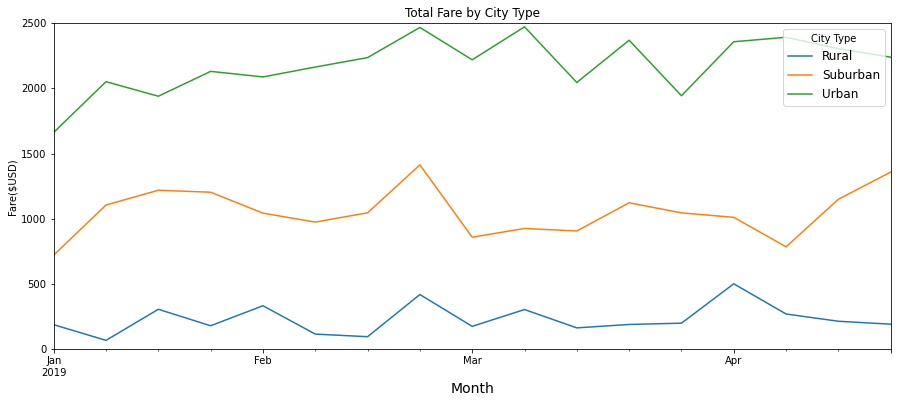

In [46]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax = weekly_fares_df.plot(figsize=(15,6))

#Add y labels
ax.set_ylabel("Fare($USD)") 
plt.ylim([0,2500])

x_axis = ax.xaxis
x_label = ax.get_xticklabels(minor = False,which = None)
# x_label.set_visible()


#add title 
ax.set_title("Total Fare by City Type")
#Legend formatting

#Create a legend
lgnd= plt.legend(fontsize="12", loc = "upper right", title = "City Type")
#lgnd= get_title().set_fountsize(12)

#weekly_fares_df.plot(figsize = 14,8))
#lt.gcf().subplots_adjust(bottom= 0.15)

#Add graph properties 
plt.title("Total Fare by City Type")
plt.ylabel("Fare($USD)") 
plt.xlabel("Month",fontsize = 14)

#save figure
plt.savefig("Analysis/Fig5.png")

#show figure
plt.show()